In [54]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from stop_words import get_stop_words
import matplotlib.pyplot as plt

In [55]:
kickstarter = pd.read_csv("csv/ks-projects-201801.csv",sep=',')
kickstarter = kickstarter[0:500]
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [56]:
clf = make_pipeline(
    TfidfVectorizer(stop_words=get_stop_words('en')),
    OneVsRestClassifier(SVC(kernel='linear', probability=True))
)
X = kickstarter['name']
Y = kickstarter['main_category']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [57]:
clf = clf.fit(X=X_train, y=Y_train)

In [58]:
print("Accuracy score is: " + str(clf.score(X_test,Y_test)))

Accuracy score is: 0.41


# Répartition des catégories de projet

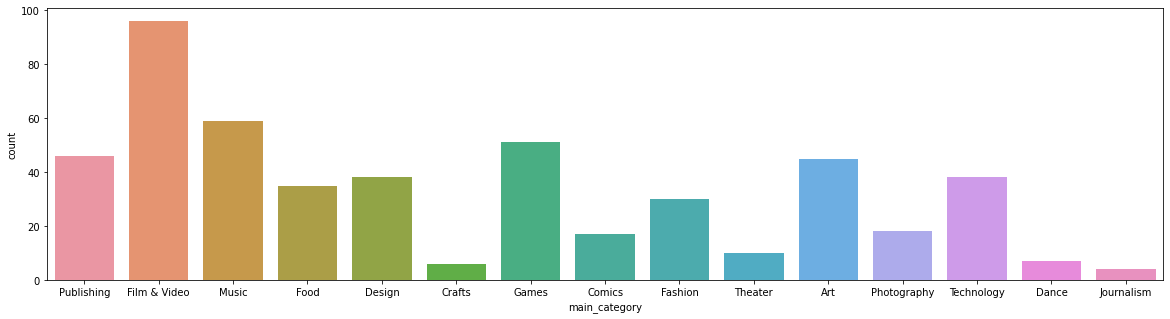

In [59]:
plt.figure(figsize=(20,5))
sns.countplot(Y)
plt.show()